In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [53]:
df = pd.read_csv("C:\\Users\\win15\\OneDrive\\Desktop\\School\\Fall2021\\ECGR-4105 Intro to Machine Learning\\Jupyter Notebook\\Engineering_graduate_salary.csv")
mod= pd.read_csv("C:\\Users\\win15\\OneDrive\\Desktop\\School\\Fall2021\\ECGR-4105 Intro to Machine Learning\\Jupyter Notebook\\Engineering_graduate_salary Mod.csv")

In [54]:
df.head()
mod.head()

,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,86.0,2007,75.20,2,1,1,76.60,176,0,17,...,-1,-1,-1,-1,-2.5811,0.0328,0.3817,0.4148,-1.0774,35000
1,85.3,2010,85.40,2,1,21,79.39,1038,1,21,...,-1,-1,-1,-1,-3.7496,-5.6151,-3.8324,-0.4879,-7.3757,35000
2,88.0,2007,80.40,2,1,3,87.65,6884,0,25,...,-1,-1,-1,-1,0.2009,0.0328,-0.9245,0.2973,-0.1295,35000
3,64.0,2008,63.33,2,2,25,71.00,8811,1,11,...,-1,-1,-1,-1,1.8517,0.2124,2.1617,-2.0092,-0.2859,40000
4,79.2,2009,89.33,2,1,8,77.00,9099,0,20,...,-1,433,-1,-1,-1.0208,-0.7866,-1.0659,-0.3612,-2.5853,40000


## Selecting Inputs
- **Using 5 features, Conscientiousness, agreeableness, extraversion, nueroticism, openess to experience - columns(29,30,31,32,33)**
- **only 1 column (34) for y as the outcome**


In [158]:
X1 = mod.iloc[:,22:27]
X2 = mod.iloc[:,0:27]
Y = mod.iloc[:,27]
# ----------------------------------------------
X4 = mod.iloc[:,25]
Y1 = mod.iloc[:,27]


In [159]:
X2.head()

,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,86.0,2007,75.20,2,1,1,76.60,176,0,17,...,-1,-1,-1,-1,-1,-2.5811,0.0328,0.3817,0.4148,-1.0774
1,85.3,2010,85.40,2,1,21,79.39,1038,1,21,...,376,-1,-1,-1,-1,-3.7496,-5.6151,-3.8324,-0.4879,-7.3757
2,88.0,2007,80.40,2,1,3,87.65,6884,0,25,...,-1,-1,-1,-1,-1,0.2009,0.0328,-0.9245,0.2973,-0.1295
3,64.0,2008,63.33,2,2,25,71.00,8811,1,11,...,-1,-1,-1,-1,-1,1.8517,0.2124,2.1617,-2.0092,-0.2859
4,79.2,2009,89.33,2,1,8,77.00,9099,0,20,...,-1,-1,433,-1,-1,-1.0208,-0.7866,-1.0659,-0.3612,-2.5853


**80% training, 20% evaluation**

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,train_size = 0.8)

**Feature Scailing**

In [161]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

array([294383.27574101, 313374.91152608, 304129.05755281, 324890.57752153,
       238363.78365479])

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score

test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [164]:
print(test_set_rmse)
print(test_set_r2)

165160.46649773075
0.0058066640126646085


## LogisticRegression 

In [165]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs', max_iter = 1000)
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

array([180000, 180000, 180000, 300000, 180000], dtype=int64)

In [166]:
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [167]:
print(test_set_rmse)
print(test_set_r2)


179443.7009371465
-0.17358643643964466


## Bayesian Regression

In [168]:
from sklearn.linear_model import BayesianRidge  
classifier = BayesianRidge()
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]


array([293650.18818209, 312053.53757675, 303230.60234883, 322863.82938542,
       242616.12442542])

In [169]:
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)
print(test_set_rmse)
print(test_set_r2)


165088.6830568159
0.006670685665335685


In [170]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X2,Y,train_size = 0.8)

#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#X_train = scale.fit_transform(X_train)
#X_test = scale.transform(X_test)

#from sklearn.linear_model import LinearRegression
#classifier = LinearRegression()
#classifier.fit(X_train, Y_train)
#y_prediction = classifier.predict(X_test)


<AxesSubplot:xlabel='openess_to_experience', ylabel='Salary'>

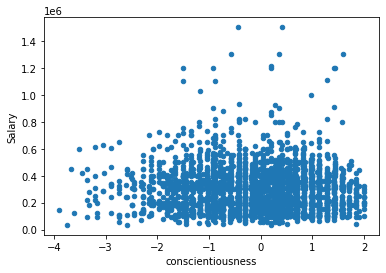

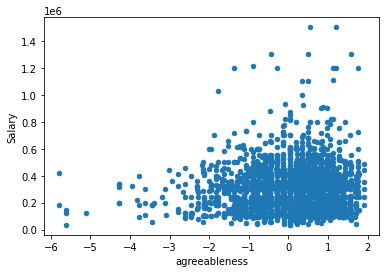

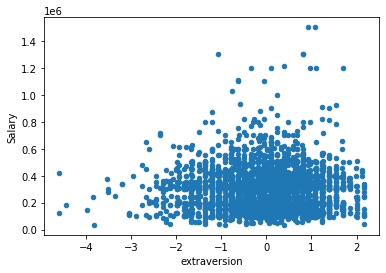

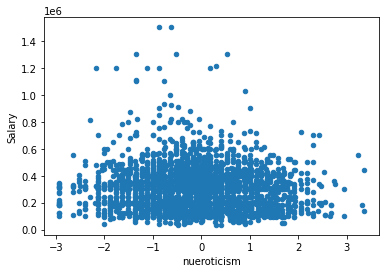

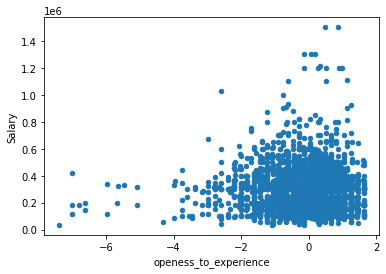

In [171]:

mod.plot(kind = 'scatter', x = 'conscientiousness', y='Salary' )
mod.plot(kind = 'scatter', x = 'agreeableness', y='Salary' )
mod.plot(kind = 'scatter', x = 'extraversion', y='Salary' )
mod.plot(kind = 'scatter', x = 'nueroticism', y='Salary' )
mod.plot(kind = 'scatter', x = 'openess_to_experience', y='Salary')


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2,Y1,train_size = 0.8)


In [173]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# PCA

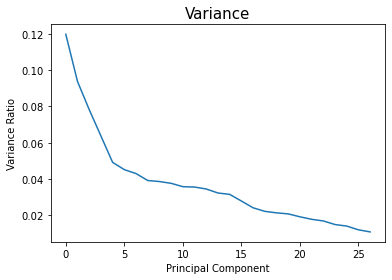

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 27)

#
pca.fit(X_train)

var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
#print(var1)

plt.xlabel('Principal Component', fontsize = 10)
plt.ylabel('Variance Ratio', fontsize = 10)
plt.title('Variance', fontsize = 15)
plt.plot(var)

In [73]:
mod_st = StandardScaler().fit_transform(mod)
pd.DataFrame(mod_st, columns=mod.columns).head(2)

,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0.833404,-0.667274,0.07773,0.284627,-0.288833,-0.840990,0.626000,-1.027684,-0.649079,0.083652,...,-0.250156,-0.199109,-0.301365,-0.088826,-2.449040,-0.099759,0.404591,0.549090,-0.927387,-1.656318
1,0.763372,1.177760,0.99487,0.284627,-0.288833,1.370136,0.969397,-0.847698,1.540646,0.659771,...,-0.250156,-0.199109,-0.301365,-0.088826,-3.580943,-5.995560,-3.970195,-0.330505,-7.168241,-1.656318


In [74]:
pca_out = PCA().fit(mod_st)

pca_out.explained_variance_ratio_

np.cumsum(pca_out.explained_variance_ratio_)

array([0.12130799, 0.2109958 , 0.28738514, 0.35147888, 0.39975195,
       0.4429563 , 0.48407719, 0.52330925, 0.56047757, 0.59720553,
       0.63263875, 0.66690547, 0.70053056, 0.73204233, 0.76251922,
       0.79029209, 0.81462059, 0.83723219, 0.85873908, 0.87903548,
       0.89881585, 0.91706097, 0.93385759, 0.95009858, 0.96432331,
       0.97765942, 0.98965224, 1.        ])

In [75]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_mod = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_mod['variable'] = mod.columns.values
loadings_mod = loadings_mod.set_index('variable')


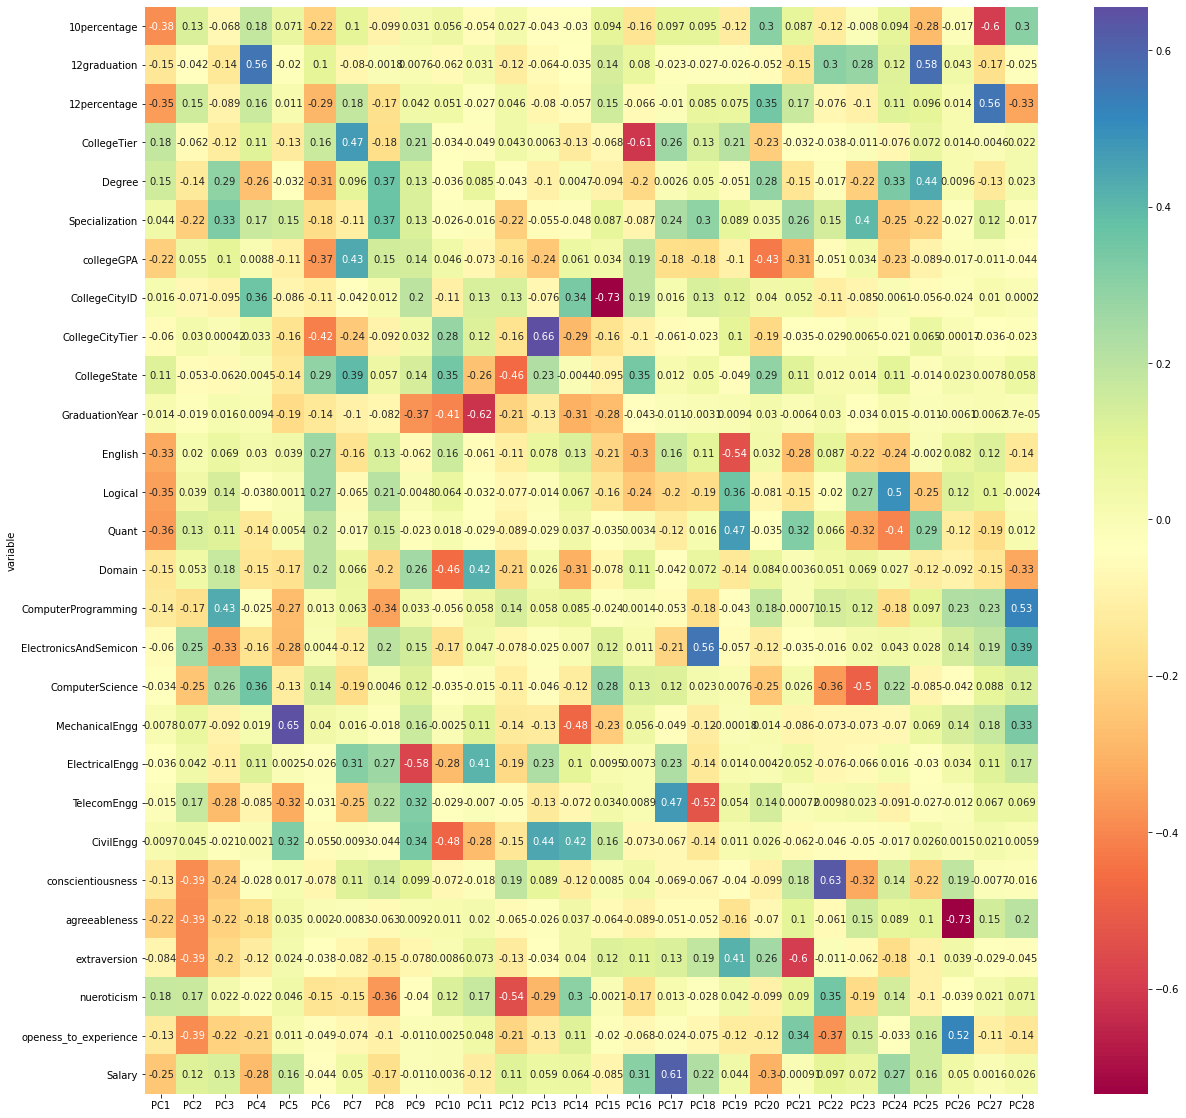

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(loadings_mod, annot=True, cmap='Spectral')
plt.show()

In [102]:
m  = len(Y1)
X_0 = np.ones((m,1))
theta = np.zeros(2)
reg = 5

# Converting 1D array to 2D array with length Y

X_1 = X4.values.reshape((m, 1))
X1=np.hstack((X_0,X_1))



In [103]:
# Cost function 

def compute_cost(X4,Y1,theta):
    prediction = X4.dot(theta)
    errors = np.subtract(prediction, Y)
    sqrErrors = np.square(errors)
    
    
    J = 1/(2*m) * np.sum(sqrErrors)
    
    return J

# Cost function with parameters penalty 

def compute_cost_reg(X4,Y1,theta, reg):
    prediction = X4.dot(theta)
    errors = np.subtract(prediction, Y1)
    sqrErrors = np.square(errors)    
    
    
    J = 1/(2*m) * (np.sum(sqrErrors) + reg*np.sum(np.square(theta)))
    
    return J

# Cost for theta values 


In [95]:
cost = compute_cost_reg(X1,Y1,theta, reg)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 56127991970.558716


In [120]:


def gradient_descent(X4, Y1, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X4.dot(theta)
        errors = np.subtract(predictions, Y1)
        sum_delta = (alpha / m) * X4.transpose().dot(errors);
        theta = theta - sum_delta;
        
        # Cost history with parameters penalty 
        cost_history[i] = compute_cost_reg(X4, Y1, theta, reg)
    
    return theta, cost_history



In [121]:
theta = np.zeros(m)
iterations = 1500;
alpha = 0.09;

In [122]:
theta, cost_history = gradient_descent(X4, Y1, theta, alpha, iterations)
print('Final value of theta =', theta)

E:\win15\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-103-38ba25ffcb1b>:21: RuntimeWarning: overflow encountered in double_scalars
  J = 1/(2*m) * (np.sum(sqrErrors) + reg*np.sum(np.square(theta)))
E:\win15\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-103-38ba25ffcb1b>:21: RuntimeWarning: overflow encountered in square
  J = 1/(2*m) * (np.sum(sqrErrors) + reg*np.sum(np.square(theta)))


Final value of theta = [nan nan nan ... nan nan nan]


(208.0, 211.0)

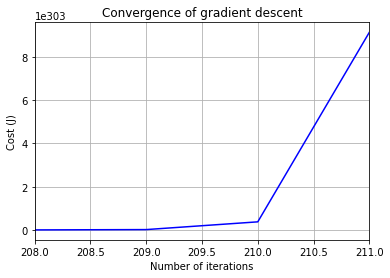

In [151]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
#plt.xlim(0, 20)
plt.grid() 
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent')
plt.xlim(208, 211)